# COVID-19 DETECTION MODELS TESTING REPORT

In [1]:
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from os.path import isdir
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import time
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}


import tensorflow as tf
from tensorflow.python.ops import summary_ops_v2
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers, metrics

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [4]:
def extract_images(filename, required_size=(200, 200)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    image = image.resize(required_size)
    pixels = asarray(image, dtype=np.float32)
    return pixels

In [5]:
def load_images(directory):
    images = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        img = extract_images(path)
        # store
        images.append(img)
    return images

# COVID-19 VS PNEUMONIA VS NORMAL

In [6]:
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_images(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

In [7]:
trainX, trainy = load_dataset('xray_dataset_covid19/')

>loaded 100 examples for class: PNEUMONIA
>loaded 100 examples for class: NORMAL
>loaded 94 examples for class: Covid


In [8]:
le = LabelEncoder()
trainy = le.fit_transform(trainy)

In [9]:
trainX, testX, trainy, testy = train_test_split(trainX, trainy, test_size=0.5)

In [10]:
compute_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
compute_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
def test_cnn_covid_pneumonia_normal(model, dataset):
    """
    Perform an evaluation of `model` on the examples from `dataset`.
    """
    avg_loss = metrics.Mean('loss', dtype=tf.float32)

    for (images, labels) in dataset:
        logits = model(images, training=False)
        avg_loss(compute_loss(labels, logits))
        compute_accuracy(labels, logits)

    print('Model test set loss: {:0.4f} accuracy: {:0.2f}%'.format(
        avg_loss.result(), compute_accuracy.result() * 100))

    return(float(compute_accuracy.result() * 100))

In [11]:
cnn_covid_pneumonia_normal = keras.models.load_model('models/CNN_Model_Covid_Pneumonia_Normal')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1476ba110> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x1476c9b10>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x10b10d810> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x10b111cd0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x10b114a10> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x10b118f50>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x10b11bc50> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x10b1231d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x10b123ed0> an


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x11aba1290> and <tensorflow.python.keras.layers.core.Dropout object at 0x10b145910>).


In [12]:
vgg_covid_pneumonia_normal = keras.models.load_model('models/VGG16_Model_Covid_Pneumonia_Normal')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x145dd4490> and <tensorflow.python.keras.layers.core.Activation object at 0x145da3950>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x145da42d0> and <tensorflow.python.keras.layers.core.Dropout object at 0x145dbe790>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x145dc2310> and <tensorflow.python.keras.layers.core.Activation object at 0x145dc96d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x145dc9fd0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x145dcb690>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x145e4a890> and <tensorflow.python.keras.layers.core.Activation object at 0x145e4cd50>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x145e516d0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x145e57d90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x145e5bc10> and <tensorflow.python.keras.layers.core.Activation object at 0x145e600d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x145e60a10> and <tensorflow.python.keras.layers.core.Dropout object at 0x145e66ed0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x145df4550> and <tensorflow.python.keras.layers.core.Activation object at 0x145defc10>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x145df9690> and <tensorflow.python.keras.layers.core.Dropout object at 0x145df8a10>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x145e04490> and <tensorflow.python.keras.layers.core.Activation object at 0x145e00b10>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x145e0d610> and <tensorflow.python.keras.layers.core.Dropout object at 0x145e0a950>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Flatten object at 0x1460000d0> and <tensorflow.python.keras.layers.core.Dropout object at 0x145ffa910>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x146000b50> and <tensorflow.python.keras.layers.core.Flatten object at 0x1460000d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x146009410> and <tensorflow.python.keras.layers.core.Activation object at 0x146005a90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x146013250> and <tensorflow.python.keras.layers.core.Dropout object at 0x14600f810>).


In [13]:
test_ds = tf.data.Dataset.from_tensor_slices((testX, testy)).batch(200)

In [14]:
cnn_acc = test_cnn_covid_pneumonia_normal(cnn_covid_pneumonia_normal,test_ds)

Model test set loss: 1.0288 accuracy: 90.48%


In [15]:
db_test = tf.data.Dataset.from_tensor_slices((testX, testy)).batch(256)
metric = keras.metrics.CategoricalAccuracy()
for x, y in db_test:
    # [b, 1] => [b]
    # y = tf.squeeze(y, axis=1)
    # [b, 10]
    y = tf.one_hot(y, depth=3)

    logits = vgg_covid_pneumonia_normal.predict(x)
    # be careful, these functions can accept y as [b] without warnning.
    metric.update_state(y, logits)
    cm_cpn = confusion_matrix(tf.math.argmax(y, axis=1), tf.math.argmax(logits, axis=1))
print('test acc:', metric.result().numpy())

test acc: 0.9455782


In [16]:
covid_pneumonia_normal_models = ['cnn_covid_pneumonia_normal', 'resnet_covid_pneumonia_normal', 'vgg_covid_pneumonia_normal']


In [17]:
covid_pneumonia_normal_acc = [cnn_acc, None, metric.result().numpy()*100]

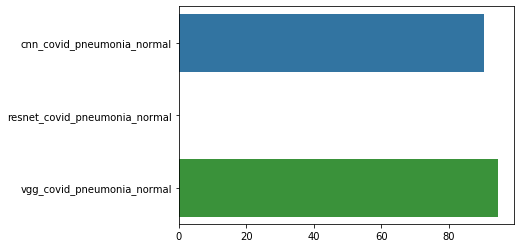

In [18]:
sns.barplot(x=covid_pneumonia_normal_acc, y=covid_pneumonia_normal_models)
plt.show()

In [19]:
df_cm_cpn = pd.DataFrame(cm_cpn)
df_cm_cpn

,0,1,2
0,47,1,1
1,0,49,4
2,0,2,43


# COVID-19 VS PNEUMONIA VS NORMAL REPORT

### CNN ACCURACY -> 90.48%
### VGG ACCURACY -> 94.5%

# COVID-19 VS NORMAL

In [20]:
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in ['Covid', 'NORMAL']:
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_images(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

In [21]:
trainX, trainy = load_dataset('xray_dataset_covid19/')

>loaded 94 examples for class: Covid
>loaded 100 examples for class: NORMAL


In [22]:
le = LabelEncoder()
trainy = le.fit_transform(trainy)

trainX, testX, trainy, testy = train_test_split(trainX, trainy, test_size=0.5)

In [23]:
compute_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
compute_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
def test_cnn_covid_pneumonia_normal(model, dataset):
    """
    Perform an evaluation of `model` on the examples from `dataset`.
    """
    avg_loss = metrics.Mean('loss', dtype=tf.float32)

    for (images, labels) in dataset:
        logits = model(images, training=False)
        avg_loss(compute_loss(labels, logits))
        compute_accuracy(labels, logits)

    print('Model test set loss: {:0.4f} accuracy: {:0.2f}%'.format(
        avg_loss.result(), compute_accuracy.result() * 100))

    return(float(compute_accuracy.result() * 100))

In [24]:
cnn_covid_normal = keras.models.load_model('models/CNN_model_normal.h5')

In [25]:
resnet_covid_normal = keras.models.load_model('models/ResNet_Model_Covid_Normal')

In [26]:
vgg_covid_normal = keras.models.load_model('models/VGG16_Model_Covid_Normal')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x165b4dad0> and <tensorflow.python.keras.layers.core.Activation object at 0x165b330d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x165b17950> and <tensorflow.python.keras.layers.core.Dropout object at 0x165b34b90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x165b36810> and <tensorflow.python.keras.layers.core.Activation object at 0x165b39c90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x165b3d610> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x165b41d50>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x165baa0d0> and <tensorflow.python.keras.layers.core.Activation object at 0x165bae550>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x165baee90> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x165bb8610>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x165bba490> and <tensorflow.python.keras.layers.core.Activation object at 0x165bbe910>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x165bc3290> and <tensorflow.python.keras.layers.core.Dropout object at 0x15a018750>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x165b5ecd0> and <tensorflow.python.keras.layers.core.Activation object at 0x165b5e390>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x165b66e50> and <tensorflow.python.keras.layers.core.Dropout object at 0x165b661d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x165b6fc10> and <tensorflow.python.keras.layers.core.Activation object at 0x165b6f2d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x165b75d90> and <tensorflow.python.keras.layers.core.Dropout object at 0x165b75110>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Flatten object at 0x15a03c950> and <tensorflow.python.keras.layers.core.Dropout object at 0x15a03c1d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x15a03f410> and <tensorflow.python.keras.layers.core.Flatten object at 0x15a03c950>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x15a044c90> and <tensorflow.python.keras.layers.core.Activation object at 0x15a044350>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x15a04ea90> and <tensorflow.python.keras.layers.core.Dropout object at 0x15a04e0d0>).


In [27]:
test_ds = tf.data.Dataset.from_tensor_slices((testX, testy)).batch(200)

cnn_acc = test_cnn_covid_pneumonia_normal(cnn_covid_normal,test_ds)

Model test set loss: 0.6723 accuracy: 93.81%


In [28]:
testy_ohe = tf.one_hot(testy, depth=3).numpy()
res = resnet_covid_normal.evaluate(testX, testy_ohe, verbose=1)

4/4 [==============================] - 13s 3s/step - loss: 0.6514 - accuracy: 0.7732


In [29]:
db_test = tf.data.Dataset.from_tensor_slices((testX, testy)).batch(256)
metric = keras.metrics.CategoricalAccuracy()
for x, y in db_test:
    # [b, 1] => [b]
    # y = tf.squeeze(y, axis=1)
    # [b, 10]
    y = tf.one_hot(y, depth=3)

    logits = vgg_covid_normal.predict(x)
    # be careful, these functions can accept y as [b] without warnning.
    metric.update_state(y, logits)
    cm_cn = confusion_matrix(tf.math.argmax(y, axis=1), tf.math.argmax(logits, axis=1))
print('test acc:', metric.result().numpy())

test acc: 1.0


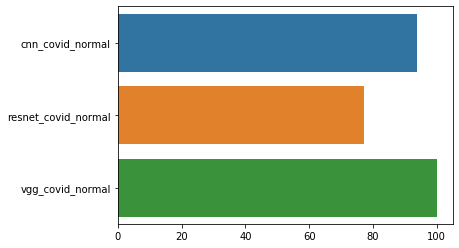

In [30]:
covid_normal_models = ['cnn_covid_normal', 'resnet_covid_normal', 'vgg_covid_normal']


covid_normal_acc = [cnn_acc, res[1]*100, metric.result().numpy()*100]


sns.barplot(x=covid_normal_acc, y=covid_normal_models)
plt.show()

In [31]:
df_cm_cn = pd.DataFrame(cm_cn, index=['false', 'true'], columns=['false', 'true'])
df_cm_cn

,false,true
false,47,0
true,0,50


# COVID-19 VS NORMAL REPORT

### CNN ACCURACY -> 93.81%
### RESNET ACCURACY -> 77.32%
### VGG ACCURACY -> 98.96%

# COVID-19 VS PNEUMONIA

In [32]:
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in ['Covid', 'PNEUMONIA']:
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_images(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

In [33]:
trainX, trainy = load_dataset('xray_dataset_covid19/')

>loaded 94 examples for class: Covid
>loaded 100 examples for class: PNEUMONIA


In [34]:
le = LabelEncoder()
trainy = le.fit_transform(trainy)

trainX, testX, trainy, testy = train_test_split(trainX, trainy, test_size=0.5)

In [35]:
compute_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
compute_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
def test_cnn_covid_pneumonia(model, dataset):
    """
    Perform an evaluation of `model` on the examples from `dataset`.
    """
    avg_loss = metrics.Mean('loss', dtype=tf.float32)

    for (images, labels) in dataset:
        logits = model(images, training=False)
        avg_loss(compute_loss(labels, logits))
        compute_accuracy(labels, logits)

    print('Model test set loss: {:0.4f} accuracy: {:0.2f}%'.format(
        avg_loss.result(), compute_accuracy.result() * 100))

    return(float(compute_accuracy.result() * 100))

In [36]:
cnn_covid_pneumonia = keras.models.load_model('models/CNN_model_covid_pneumonia')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16286ca90> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x16286ff90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x162873c90> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x162878210>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x16287c550> and <tensorflow.python.keras.layers.core.Dropout object at 0x16287e290>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16286ca90> and <tensorflow.python.keras.layers.core.Reshape object at 0x162864c90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x162873c90> and <tensorflow.python.keras

In [37]:
resnet_covid_pneumonia = keras.models.load_model('models/ResNet_Model_Covid_Pneumonia')

In [38]:
vgg_covid_pneumonia = keras.models.load_model('models/VGG16_Model_Covid_Pneumonia')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16e2f5350> and <tensorflow.python.keras.layers.core.Activation object at 0x16e2c4810>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16e2c5210> and <tensorflow.python.keras.layers.core.Dropout object at 0x16e2de650>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16e2df150> and <tensorflow.python.keras.layers.core.Activation object at 0x16e2e1590>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16e2e1e10> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x16e2e5450>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16eb0c4d0> and <tensorflow.python.keras.layers.core.Activation object at 0x16eb17950>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16eb19250> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x16eb21850>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16eb23650> and <tensorflow.python.keras.layers.core.Activation object at 0x16eb27ad0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16eb2a3d0> and <tensorflow.python.keras.layers.core.Dropout object at 0x16eb30750>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16e305d90> and <tensorflow.python.keras.layers.core.Activation object at 0x16e3054d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16e30dd10> and <tensorflow.python.keras.layers.core.Dropout object at 0x16e30d150>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16e317a50> and <tensorflow.python.keras.layers.core.Activation object at 0x16e317190>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x16e3219d0> and <tensorflow.python.keras.layers.core.Dropout object at 0x16e31ddd0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Flatten object at 0x16d346350> and <tensorflow.python.keras.layers.core.Dropout object at 0x16d342b90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x16d346dd0> and <tensorflow.python.keras.layers.core.Flatten object at 0x16d346350>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x16d34e590> and <tensorflow.python.keras.layers.core.Activation object at 0x16d34ac90>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x16d3581d0> and <tensorflow.python.keras.layers.core.Dropout object at 0x16d354850>).


In [39]:
test_ds = tf.data.Dataset.from_tensor_slices((testX, testy)).batch(200)

cnn_acc = test_cnn_covid_pneumonia(cnn_covid_pneumonia,test_ds)
cnn_acc

Model test set loss: 0.6927 accuracy: 51.55%


51.546390533447266

In [40]:
testy_ohe = tf.one_hot(testy, depth=3).numpy()
res = resnet_covid_pneumonia.evaluate(testX, testy_ohe, verbose=1)

4/4 [==============================] - 12s 3s/step - loss: 0.0835 - accuracy: 0.9691


In [41]:
db_test = tf.data.Dataset.from_tensor_slices((testX, testy)).batch(256)
metric = keras.metrics.CategoricalAccuracy()
for x, y in db_test:
    # [b, 1] => [b]
    # y = tf.squeeze(y, axis=1)
    # [b, 10]
    y = tf.one_hot(y, depth=3)

    logits = vgg_covid_pneumonia.predict(x)
    # be careful, these functions can accept y as [b] without warnning.
    metric.update_state(y, logits)
    cm_cp = confusion_matrix(tf.math.argmax(y, axis=1), tf.math.argmax(logits, axis=1))
print('test acc:', metric.result().numpy())

test acc: 0.9896907


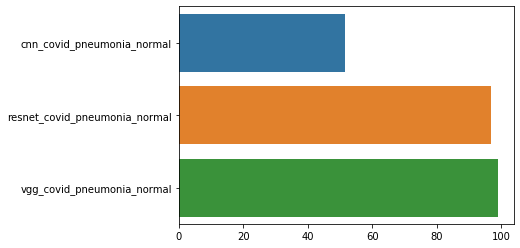

In [42]:
covid_pneumonia_models = ['cnn_covid_pneumonia_normal', 'resnet_covid_pneumonia_normal', 'vgg_covid_pneumonia_normal']


covid_pneumonia_acc = [cnn_acc, res[1]*100, metric.result().numpy()*100]
splot = sns.barplot(x=covid_pneumonia_acc, y=covid_pneumonia_models)

In [43]:
df_cm_cp = pd.DataFrame(cm_cp, index=['false', 'true'], columns=['false', 'true'])

In [44]:
df_cm_cp

,false,true
false,46,1
true,0,50


# COVID-19 VS PNEUMONIA REPORT

### CNN ACCURACY -> 51.51%
### RESNET ACCURACY -> 96.91%
### VGG ACCURACY -> 98.96%